# Lesson 8 Assignment - Abalone Age Determination

## Author - Mike Pearson

### Background
Age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope. Other measurements, which are easier to obtain, could be used to predict the age. According to the data provider, original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled (by dividing by 200) for use with machine learning algorithms such as SVMs and ANNs.

The target field is “Rings”. Since the output is continuous the solution can be handled by a Support Vector Regression or it can be changed to a binary Support Vector Classification by assigning examples that are younger than 11 years old to class: ‘0’ and those that are older (class: ‘1’).

Predict the age using the following attributes:
* Sex / nominal / -- / M, F, and I (infant)
* Length / continuous / mm / Longest shell measurement
* Diameter / continuous / mm / perpendicular to length
* Height / continuous / mm / with meat in shell
* Whole weight / continuous / grams / whole abalone
* Shucked weight / continuous / grams / weight of meat
* Viscera weight / continuous / grams / gut weight (after bleeding)
* Shell weight / continuous / grams / after being dried

See [UCI's Abalone Data set](https://archive.ics.uci.edu/ml/datasets/abalone) for more information.

## Tasks
Use the provided abalone.csv file, build an experiment using support vector machine classifier and regression. Complete the following tasks and answer the questions:

1. Convert the continuous output value from continuous to binary (0,1) and build an SVC
2. Using your best guess for hyperparameters and kernel, what is the percentage of correctly classified results?
3. Test different kernels and hyperparameters or consider using `sklearn.model_selection.SearchGridCV`. Which kernel performed best with what settings?
4. Show recall, precision and f-measure for the best model
5. Using the original data, with rings as a continuous variable, create an SVR model
6. Report on the predicted variance and the mean squared error

In [1]:
# Data set contains 4177 rows and 9 columns.
URL = "https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/abalone.csv"


In [2]:
# Import libraries
import numpy as np
import pandas as pd

In [3]:
## import the data

abalone = pd.read_csv(URL)
print(abalone.head())
print(abalone.dtypes)
print(abalone.describe())

  Sex  Length  Diameter  Height  Whole Weight  Shucked Weight  Viscera Weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell Weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  
Sex                object
Length            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Rings               int64
dtype: object
            Length     Diameter       Height  Whole Weight  Shucked Weight  \
count  4177.000000  4177.000000  4177

## Now convert the catagorical variables to one-hot encoding

In [4]:
catz = ["Sex"]
wide_abalone = pd.get_dummies(abalone, columns = catz)
print(wide_abalone.head())

   Length  Diameter  Height  Whole Weight  Shucked Weight  Viscera Weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell Weight  Rings  Sex_F  Sex_I  Sex_M  
0         0.150     15      0      0      1  
1         0.070      7      0      0      1  
2         0.210      9      1      0      0  
3         0.155     10      0      0      1  
4         0.055      7      0      1      0  


## Now let's min-max normalize all the features
I know that the data has been scaled, but I would like to normalize before continuing


In [5]:
## normalize the length
min_len = np.min(wide_abalone['Length'])
max_len = np.max(wide_abalone['Length'])
range_len = max_len - min_len
wide_abalone['normed length']= (wide_abalone['Length'] - min_len)/range_len

## normalize the Diameter
min_d = np.min(wide_abalone['Diameter'])
max_d = np.max(wide_abalone['Diameter'])
range_d = max_d - min_d
wide_abalone['normed diameter']= (wide_abalone['Diameter'] - min_d)/range_d

## normalize the height
min_hei = np.min(wide_abalone['Height'])
max_hei = np.max(wide_abalone['Height'])
range_hei = max_hei - min_hei
wide_abalone['normed height']= (wide_abalone['Height'] - min_hei)/range_hei
                              
## normalize the Whole Weight
min_ww = np.min(wide_abalone['Whole Weight'])
max_ww = np.max(wide_abalone['Whole Weight'])
range_ww = max_ww - min_ww
wide_abalone['normed w weight']= (wide_abalone['Whole Weight'] - min_ww)/range_ww

## normalize the Shucked Weight
                              
min_sw = np.min(wide_abalone['Shucked Weight'])
max_sw = np.max(wide_abalone['Shucked Weight'])
range_sw = max_sw - min_sw
wide_abalone['normed s weight']= (wide_abalone['Shucked Weight'] - min_sw)/range_sw

## normalize the Viscera Weight
                              
min_vw = np.min(wide_abalone['Viscera Weight'])
max_vw = np.max(wide_abalone['Viscera Weight'])
range_vw = max_vw - min_vw
wide_abalone['normed v weight']= (wide_abalone['Viscera Weight'] - min_vw)/range_vw

## normalize the Shell Weight
                              
min_shw = np.min(wide_abalone['Shell Weight'])
max_shw = np.max(wide_abalone['Shell Weight'])
range_shw = max_shw - min_shw
wide_abalone['normed shell weight']= (wide_abalone['Shell Weight'] - min_shw)/range_shw



print(wide_abalone.describe())

            Length     Diameter       Height  Whole Weight  Shucked Weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera Weight  Shell Weight        Rings        Sex_F        Sex_I  \
count     4177.000000   4177.000000  4177.000000  4177.000000  4177.000000   
mean         0.180594      0.238831     9.933684     0.312904     0.321283   
std          0.109614      0.139203     3.224169     0.463731  

## Now let's set the boundary for the rings at more than 11 = 1 and 11 or less = 0

In [6]:
bob = len(wide_abalone["Rings"])
for i in range(bob):
    if wide_abalone.loc[i, "Rings"] <= 10 :
        wide_abalone.loc[i,"binned rings"] = 0
    else :
        wide_abalone.loc[i,"binned rings"] = 1

print(wide_abalone.tail())
    

      Length  Diameter  Height  Whole Weight  Shucked Weight  Viscera Weight  \
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell Weight  Rings  Sex_F  Sex_I  Sex_M  normed length  \
4172        0.2490     11      1      0      0       0.662162   
4173        0.2605     10      0      0      1       0.695946   
4174        0.3080      9      0      0      1       0.709459   
4175        0.2960     10      1      0      0       0.743243   
4176        0.4950     12      0      0      1       0.858108   

      normed diameter  normed height  normed w weight  normed s weight  \
4172         0.663866       0.146018         0.313441 

In [7]:
# Separate Features from Target
X = wide_abalone.iloc[:, 8:17]   # load features into X DF
Y = wide_abalone.iloc[:, 18]     # Load target into Y DF
print(X.head())
print(Y.tail())

   Sex_F  Sex_I  Sex_M  normed length  normed diameter  normed height  \
0      0      0      1       0.513514         0.521008       0.084071   
1      0      0      1       0.371622         0.352941       0.079646   
2      1      0      0       0.614865         0.613445       0.119469   
3      0      0      1       0.493243         0.521008       0.110619   
4      0      1      0       0.344595         0.336134       0.070796   

   normed w weight  normed s weight  normed v weight  
0         0.181335         0.150303         0.132324  
1         0.079157         0.066241         0.063199  
2         0.239065         0.171822         0.185648  
3         0.182044         0.144250         0.149440  
4         0.071897         0.059516         0.051350  
4172    1.0
4173    0.0
4174    0.0
4175    0.0
4176    1.0
Name: binned rings, dtype: float64


## Now let's make the training and test sets.

In [8]:
from sklearn.model_selection import train_test_split

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
print(y_test.head())

3342    1.0
791     0.0
1420    1.0
729     1.0
1186    1.0
Name: binned rings, dtype: float64


## Now to start with some values for the hyperparameters


In [9]:
cost = 1000 # penalty parameter of the error term
gamma = 0.2 # defines the influence of input vectors on the margins

## Now do linear

In [10]:
from sklearn import svm, metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sbn

clf1 = svm.LinearSVC(C=cost).fit(X_train, y_train)
y_pred = clf1.predict(X_test)
print("LinearSVC")
print(classification_report(clf1.predict(X_test), y_test))
print(confusion_matrix(y_test, y_pred))

ax = sbn.heatmap(confusion_matrix(y_test, y_pred),annot = True, fmt = "d")

/Users/mutecypher/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC
              precision    recall  f1-score   support

         0.0       0.96      0.74      0.84       705
         1.0       0.38      0.84      0.52       131

    accuracy                           0.76       836
   macro avg       0.67      0.79      0.68       836
weighted avg       0.87      0.76      0.79       836

[[523  21]
 [182 110]]


In [11]:
# Test linear, rbf and poly kernels
cost = 1000 # penalty parameter of the error term
gamma = 0.2 # defines the influence of input vectors on the margins

for k in ('linear', 'rbf', 'poly','sigmoid'):
    clf = svm.SVC(gamma=gamma, kernel=k, C=cost, degree = 4).fit(X_train, y_train)
    clf.predict(X_test)
    print(k)
    print(classification_report(clf.predict(X_test), y_test))
    print(confusion_matrix(y_test, y_pred))

linear
              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85       595
         1.0       0.61      0.74      0.67       241

    accuracy                           0.79       836
   macro avg       0.75      0.78      0.76       836
weighted avg       0.81      0.79      0.80       836

[[523  21]
 [182 110]]
rbf
              precision    recall  f1-score   support

         0.0       0.90      0.83      0.86       584
         1.0       0.67      0.77      0.72       252

    accuracy                           0.82       836
   macro avg       0.78      0.80      0.79       836
weighted avg       0.83      0.82      0.82       836

[[523  21]
 [182 110]]
poly
              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85       614
         1.0       0.58      0.77      0.66       222

    accuracy                           0.79       836
   macro avg       0.74      0.78      0.76       836
weighted avg

## Now let's try grid search

In [12]:
C_range = np.logspace(-4, 4, 9)
gamma_range = np.logspace(-4, 4, 9)
degree_param = [2,3,4]
print("C is", C_range)
print("gamma range is ", gamma_range)

C is [1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
gamma range is  [1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]


## Let's try to narrow our parameter search a little more quickly than Gridsearch, with RandomizedSearch

### The polynomial kernel seems the most sensitive to gamma - in terms of the time to calculate.

Note - this bit of code takes a while to run, I don't know if you (the evaluator) will run this code or not

In [13]:
from sklearn.svm import SVC
##from sklearn.model_selection import RandomizedSearchCV
import time
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

param_grid = {'kernel': [ 'linear', 'sigmoid', 'rbf'], 'gamma': gamma_range, 'C' : C_range}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv = cv)
##grid = RandomizedSearchCV(SVC(), param_distributions = param_grid, cv=cv)
grid.fit(X_train, y_train)
print('The best parameters are %s with a score of %0.2f and time is %0.2f'
      % (grid.best_params_, grid.best_score_, grid.refit_time_))




The best parameters are {'C': 10000.0, 'gamma': 0.1, 'kernel': 'rbf'} with a score of 0.79 and time is 0.75


## Using the above for some further refinement...  this time using GridSearch



In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


C_range = [9000,10000, 12000]
gamma_range = [0.05, 0.08, 0.1, 0.12]
degree_range = [3, 4]

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

param_grid = {'kernel': [ 'linear', 'rbf','poly'], 'gamma': gamma_range, 'C' : C_range, 'degree': degree_range}
##param_grid = dict(kernelgamma=gamma_range, C=C_range)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv = cv)
grid.fit(X_train, y_train)
print('The best parameters are %s with a score of %0.2f and time is %0.2f'
      % (grid.best_params_, grid.best_score_, grid.refit_time_))



The best parameters are {'C': 10000, 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf'} with a score of 0.79 and time is 0.76


## Using the GridSearch, get the performance data

## Now use the hyperparameters to do a fit that gives us all the performance data

### Here we have the recall, precision and f1-score


              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86       581
         1.0       0.66      0.76      0.71       255

    accuracy                           0.81       836
   macro avg       0.77      0.79      0.78       836
weighted avg       0.82      0.81      0.81       836

[[523  21]
 [182 110]]


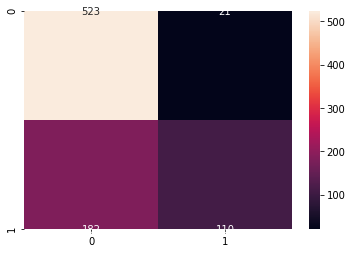

In [15]:

clf = svm.SVC(gamma=0.1, kernel='rbf', C= 10000).fit(X_train, y_train)
clf.predict(X_test)

print(classification_report(clf.predict(X_test), y_test))
print(confusion_matrix(y_test, y_pred))

ax = sbn.heatmap(confusion_matrix(y_test, y_pred),annot = True, fmt = "d")

## Now use the hyperparameters to do a fit that gives us all the performance data


## now for the unscaled data with linear regression

In [16]:
print(wide_abalone.head())

   Length  Diameter  Height  Whole Weight  Shucked Weight  Viscera Weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell Weight  Rings  Sex_F  Sex_I  Sex_M  normed length  normed diameter  \
0         0.150     15      0      0      1       0.513514         0.521008   
1         0.070      7      0      0      1       0.371622         0.352941   
2         0.210      9      1      0      0       0.614865         0.613445   
3         0.155     10      0      0      1       0.493243         0.521008   
4         0.055      7      0      1      0       0.344595         0.336134   

   normed height  normed w weight  normed s weight  normed v w

In [ ]:
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error 

# Get the unscaled data
X1 = wide_abalone[['Length', 'Diameter', 'Height',  'Whole Weight','Shucked Weight', 'Viscera Weight','Shell Weight'
            ,'Sex_F', 'Sex_I','Sex_M']]
# load features into X DF
Y1 = wide_abalone[['Rings']]


# split into a training and testing set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=5)

C_range = [200, 225,250]
gamma_range = [1e-12, 1e-11, 1e-10, 4e-10]
cv = 5

param_grid = {'kernel': ['linear', 'rbf'], 'gamma': gamma_range, 'C' : C_range}
##param_grid = dict(kernelgamma=gamma_range, C=C_range)
grid = GridSearchCV(SVR(), param_grid=param_grid, cv = cv, refit = True)
grid.fit(X1_train, y1_train.values.ravel())
print('The best parameters are %s with a score of %0.2f and time is %0.2f'
      % (grid.best_params_, grid.best_score_, grid.refit_time_))



## Now using the above hyperparameters, we get the performance metrics

In [ ]:
import math

model = SVR()
print(model)
SVR(C = 225, gamma = 1e-12 ,kernel='linear') 
model.fit(X1_train,y1_train.values.ravel())
pred_y = model.predict(X1_test)

score=model.score(X1_test,y1_test)
print('the f1-score is %0.3f'% score)

 
mse =mean_squared_error(y1_test.values.ravel(), pred_y)
print('Mean Squared Error: %0.3f'% mse)


delt_for_var = pred_y - y_test
print('Variance is %0.3f'% np.var(delt_for_var))